In [2]:
import pandas as pd

file_path = "./MedQA/questions/US/4_options/phrases_no_exclude_test.jsonl"

jsonObj = pd.read_json(path_or_buf=file_path, lines=True)
#jsonObj = jsonObj[jsonObj["answer"].str.contains('vir')]

#jsonObj_qa = jsonObj.drop(["meta_info", "metamap_phrases"], axis=1)
#jsonObj_qa = jsonObj_qa.to_csv('MedQA.csv', sep=",", index=False)
jsonObj

,question,answer,options,meta_info,answer_idx,metamap_phrases
0,A junior orthopaedic surgery resident is compl...,Tell the attending that he cannot fail to disc...,{'A': 'Disclose the error to the patient and p...,step1,B,"[junior orthopaedic surgery resident, completi..."
1,A 67-year-old man with transitional cell carci...,Cross-linking of DNA,"{'A': 'Inhibition of proteasome', 'B': 'Hypers...",step1,D,"[67 year old man, transitional cell carcinoma ..."
2,Two weeks after undergoing an emergency cardia...,Cholesterol embolization,"{'A': 'Renal papillary necrosis', 'B': 'Choles...",step2&3,B,"[Two weeks, emergency cardiac, stenting, unsta..."
3,A 39-year-old woman is brought to the emergenc...,"Lactose-fermenting, gram-negative rods forming...","{'A': 'Coagulase-positive, gram-positive cocci...",step1,D,"[year old woman, brought, emergency department..."
4,A 35-year-old man comes to the physician becau...,Ketotifen eye drops,"{'A': 'Erythromycin ointment', 'B': 'Ketotifen...",step2&3,B,"[35 year old man, physician, of itchy, watery,..."
...,...,...,...,...,...,...
1268,A 39-year-old woman presents to the clinic for...,Thyroid-stimulating hormone (TSH),"{'A': 'Glucose', 'B': 'Triiodothyronine (T3)',...",step2&3,D,"[year old woman presents, clinic, annual physi..."
1269,A 38-year-old woman comes to the physician bec...,Medication abuse,"{'A': 'Celiac disease', 'B': 'Carcinoid tumor'...",step2&3,D,"[year old woman, physician, persistent diarrhe..."
1270,A 21-year-old college student comes to the phy...,Stop evening exercise,"{'A': 'Trial of diphenhydramine', 'B': 'Stop e...",step2&3,B,"[21-year-old college student, physician, of da..."
1271,A 19-year-old man is brought to the physician ...,Schizotypal personality disorder,"{'A': 'Social anxiety disorder', 'B': 'Avoidan...",step2&3,C,"[year old man, brought, physician, mother, wor..."


In [4]:
#MedMCQA
import pandas as pd
import itertools
file_path = "./MedMCQA/test.json"
dictionary_file_antivir = "antivir_list.csv"
dictionary_file_vir = "virus_list.csv"

disease_list = [
    "Cytomegalic inclusion disease",
    "Infectious mononucleosis",
    "Dengue hemorrhagic fever",
    "Dengue fever",
    "Lassa fever",
    "Marburg hemorrhagic fever",
    "Marburg fever",
    "Yellow fever",
    "Smallpox",
    "Rabies",
    "Hepatitis A",
    "Hepatitis B",
    "Hepatitis C"
    "Measles",
    "Shingles",
    "Poliomyelitis",
    "Influenza",
    "Mumps",
    "Papilloma",
    "Chickenpox",
    "Rubella",
    "AIDS",
    "Genital warts",
    "Warts",
    "Viral",
    "Virus"
]
pattern_disease = '|'.join([f'(?i){disease}' for disease in disease_list])

virus_genus_list = pd.read_csv(dictionary_file_vir)
antivir_list = pd.read_csv(dictionary_file_antivir)

virus_list = virus_genus_list["Virus"].to_list()
split_virus_list = [virus.split(" + ") for virus in virus_list]
split_virus_list = list(itertools.chain(*split_virus_list))
split_virus_list = [virus.replace('+', '') for virus in split_virus_list]
split_virus_list = [virus.replace('=', '') for virus in split_virus_list]
split_virus_list = [virus.replace('(', '') for virus in split_virus_list]
split_virus_list = [virus.replace(')', '') for virus in split_virus_list]
pattern_virus = '|'.join([f'(?i){virus}' for virus in split_virus_list])


genus_list = virus_genus_list["Genus_Family"].to_list()
split_genus_list = [genus.split(" , ") for genus in genus_list]
split_genus_list = list(itertools.chain(*split_genus_list))
pattern_genus = '|'.join([f'(?i){genus}' for genus in split_genus_list])



antivir_list = antivir_list["Drugs"].to_list()
pattern_antivir = '|'.join([f'(?i){antivir}' for antivir in antivir_list])


pattern = pattern_virus + pattern_genus + pattern_antivir + pattern_disease

MedMCQA = pd.read_json(path_or_buf=file_path, lines=True)
MEDMCQA
MedMCQA = MedMCQA[MedMCQA["choice_type"].str.contains('single')]
MedMCQA_Q = MedMCQA[MedMCQA["question"].str.contains(pattern)]
MedMCQA_opa = MedMCQA[MedMCQA["opa"].str.contains(pattern)]
MedMCQA_opb = MedMCQA[MedMCQA["opb"].str.contains(pattern)]
MedMCQA_opc = MedMCQA[MedMCQA["opc"].str.contains(pattern)]
MedMCQA_opd = MedMCQA[MedMCQA["opd"].str.contains(pattern)]
frames = [MedMCQA_Q, MedMCQA_opa, MedMCQA_opb, MedMCQA_opc, MedMCQA_opd]
result = pd.concat(frames)
result = result.drop_duplicates()
result = result.to_csv("./MedMCQA/MedMCQA_vir_Q.csv")


/tmp/ipykernel_25863/1955376180.py:66: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  MedMCQA_Q = MedMCQA[MedMCQA["question"].str.contains(pattern)]
/tmp/ipykernel_25863/1955376180.py:67: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  MedMCQA_opa = MedMCQA[MedMCQA["opa"].str.contains(pattern)]
/tmp/ipykernel_25863/1955376180.py:68: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  MedMCQA_opb = MedMCQA[MedMCQA["opb"].str.contains(pattern)]
/tmp/ipykernel_25863/1955376180.py:69: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  MedMCQA_opc = MedMCQA[MedMCQA["opc"].str.contains(pattern)]
/tmp/ipykernel_25863/1955376180.py:70: UserWarning: This patt

In [2]:
#MedMCQA
import pandas as pd
import itertools
file_path = "./MedMCQA/dev.json"
dictionary_file_antivir = "antivir_list.csv"
dictionary_file_vir = "virus_list.csv"

disease_list = [
    "Cytomegalic inclusion disease",
    "Infectious mononucleosis",
    "Dengue hemorrhagic fever",
    "Dengue fever",
    "Lassa fever",
    "Marburg hemorrhagic fever",
    "Marburg fever",
    "Yellow fever",
    "Smallpox",
    "Rabies",
    "Hepatitis A",
    "Hepatitis B",
    "Hepatitis C"
    "Measles",
    "Shingles",
    "Poliomyelitis",
    "Influenza",
    "Mumps",
    "Papilloma",
    "Chickenpox",
    "Rubella",
    "AIDS",
    "Genital warts",
    "Warts",
    "Viral",
    "Virus"
]
pattern_disease = '|'.join([f'(?i){disease}' for disease in disease_list])

virus_genus_list = pd.read_csv(dictionary_file_vir)
antivir_list = pd.read_csv(dictionary_file_antivir)

virus_list = virus_genus_list["Virus"].to_list()
split_virus_list = [virus.split(" + ") for virus in virus_list]
split_virus_list = list(itertools.chain(*split_virus_list))
split_virus_list = [virus.replace('+', '') for virus in split_virus_list]
split_virus_list = [virus.replace('=', '') for virus in split_virus_list]
split_virus_list = [virus.replace('(', '') for virus in split_virus_list]
split_virus_list = [virus.replace(')', '') for virus in split_virus_list]
pattern_virus = '|'.join([f'(?i){virus}' for virus in split_virus_list])


genus_list = virus_genus_list["Genus_Family"].to_list()
split_genus_list = [genus.split(" , ") for genus in genus_list]
split_genus_list = list(itertools.chain(*split_genus_list))
pattern_genus = '|'.join([f'(?i){genus}' for genus in split_genus_list])



antivir_list = antivir_list["Drugs"].to_list()
pattern_antivir = '|'.join([f'(?i){antivir}' for antivir in antivir_list])


pattern = pattern_virus + pattern_genus + pattern_antivir + pattern_disease

MedMCQA = pd.read_json(path_or_buf=file_path, lines=True)
MedMCQA = MedMCQA[MedMCQA["choice_type"].str.contains('single')]
MedMCQA_exp = MedMCQA[MedMCQA["exp"].str.contains(pattern, na=False)]
MedMCQA_Q = MedMCQA[MedMCQA["question"].str.contains(pattern, na=False)]
MedMCQA_opa = MedMCQA[MedMCQA["opa"].str.contains(pattern, na=False)]
MedMCQA_opb = MedMCQA[MedMCQA["opb"].str.contains(pattern, na=False)]
MedMCQA_opc = MedMCQA[MedMCQA["opc"].str.contains(pattern, na=False)]
MedMCQA_opd = MedMCQA[MedMCQA["opd"].str.contains(pattern, na=False)]
frames = [MedMCQA_exp, MedMCQA_Q, MedMCQA_opa, MedMCQA_opb, MedMCQA_opc, MedMCQA_opd]
result = pd.concat(frames)
result = result.drop_duplicates()
result = result.to_csv("./MedMCQA/MedMCQA_vir_Q_2.csv")

/tmp/ipykernel_1291188/840366747.py:66: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  MedMCQA_exp = MedMCQA[MedMCQA["exp"].str.contains(pattern, na=False)]
/tmp/ipykernel_1291188/840366747.py:67: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  MedMCQA_Q = MedMCQA[MedMCQA["question"].str.contains(pattern, na=False)]
/tmp/ipykernel_1291188/840366747.py:68: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  MedMCQA_opa = MedMCQA[MedMCQA["opa"].str.contains(pattern, na=False)]
/tmp/ipykernel_1291188/840366747.py:69: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  MedMCQA_opb = MedMCQA[MedMCQA["opb"].str.contains(pattern, na=False)]
/tmp/ipykernel_12

In [6]:
#PubMedQA
import pandas as pd
import json
import itertools

file_path = "./PubMedQA/ori_pqaa.json"

dictionary_file_antivir = "antivir_list.csv"
dictionary_file_vir = "virus_list.csv"

disease_list = [
    "Cytomegalic inclusion disease",
    "Infectious mononucleosis",
    "Dengue hemorrhagic fever",
    "Dengue fever",
    "Lassa fever",
    "Marburg hemorrhagic fever",
    "Marburg fever",
    "Yellow fever",
    "Smallpox",
    "Rabies",
    "Hepatitis A",
    "Hepatitis B",
    "Hepatitis C"
    "Measles",
    "Shingles",
    "Poliomyelitis",
    "Influenza",
    "Mumps",
    "Papilloma",
    "Chickenpox",
    "Rubella",
    "AIDS",
    "Genital warts",
    "Warts",
    "Viral",
    "Virus"
]
pattern_disease = '|'.join([f'(?i){disease}' for disease in disease_list])

virus_genus_list = pd.read_csv(dictionary_file_vir)
antivir_list = pd.read_csv(dictionary_file_antivir)

virus_list = virus_genus_list["Virus"].to_list()
split_virus_list = [virus.split(" + ") for virus in virus_list]
split_virus_list = list(itertools.chain(*split_virus_list))
split_virus_list = [virus.replace('+', '') for virus in split_virus_list]
split_virus_list = [virus.replace('=', '') for virus in split_virus_list]
split_virus_list = [virus.replace('(', '') for virus in split_virus_list]
split_virus_list = [virus.replace(')', '') for virus in split_virus_list]
pattern_virus = '|'.join([f'(?i){virus}' for virus in split_virus_list])


genus_list = virus_genus_list["Genus_Family"].to_list()
split_genus_list = [genus.split(" , ") for genus in genus_list]
split_genus_list = list(itertools.chain(*split_genus_list))
pattern_genus = '|'.join([f'(?i){genus}' for genus in split_genus_list])



antivir_list = antivir_list["Drugs"].to_list()
pattern_antivir = '|'.join([f'(?i){antivir}' for antivir in antivir_list])


pattern = pattern_virus + pattern_genus + pattern_antivir + pattern_disease

pubmed_QA = pd.read_json(path_or_buf=file_path, orient="columns")
pubmed_QA = pubmed_QA.transpose()


pubmed_QA_question = pubmed_QA[pubmed_QA["QUESTION"].str.contains(pattern)]
#pubmed_QA_contexts = pubmed_QA[pubmed_QA["CONTEXTS"].str.contains(pattern)]
#pubmed_QA_meshes = pubmed_QA[pubmed_QA["MESHES"].str.contains(pattern)]

#frames = [pubmed_QA_question, pubmed_QA_contexts, pubmed_QA_meshes]
#result = pd.concat(frames)
#result = result.drop_duplicates()
#result

pubmed_QA_question = pubmed_QA_question.to_csv("./PubMedQA/PubMed_QA_vir.csv")

#[
#    "QUESTION",
#    "CONTEXTS",
#    "LABELS",
#    "LONG_ANSWER",
#    "MESHES",
#    "final_decision"
#]


/tmp/ipykernel_25863/2172950155.py:71: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  pubmed_QA_question = pubmed_QA[pubmed_QA["QUESTION"].str.contains(pattern)]


In [8]:
#PubMedQA (cont)

file_path = "./PubMedQA/PubMed_QA_vir.csv"

pubmed_QA_vir = pd.read_csv(file_path)
pubmed_QA_vir

,PMID,QUESTION,CONTEXTS,LONG_ANSWER,MESHES,final_decision
0,25449231,Do immunizations with hepatitis B viral antige...,['The capacity of toll-like receptor (TLR) 7/8...,Immunization with CL097-conjugated HBV-Ag reve...,"['Adjuvants, Immunologic', 'Animals', 'Hepatit...",yes
1,25450204,Is saikosaponin b2 a naturally occurring terpe...,['A vaccine against hepatitis C virus (HCV) is...,"Due to its potency, SSb2 may be of value for d...","['Animals', 'Antiviral Agents', 'Bupleurum', '...",yes
2,25426190,Are human enteroviruses the cause of neurologi...,['Convulsions associated with fever and acute ...,Non-polio enteroviruses and chikugunya virus w...,"['Child, Preschool', 'DNA, Viral', 'Encephalit...",no
3,25448926,Does liver-specific deletion of augmenter of l...,"['Augmenter of liver regeneration (ALR, encode...",We developed mice with liver-specific deletion...,"['Animals', 'Apoptosis', 'Carcinoma, Hepatocel...",yes
4,25433008,Does the dual CCR5 and CCR2 inhibitor cenicriv...,['Cenicriviroc is a potent antagonist of the c...,"In contrast to maraviroc, cenicriviroc does no...","['Anti-HIV Agents', 'Cell Line', 'Clinical Tri...",no
...,...,...,...,...,...,...
5805,11451666,Does rFI-641 inhibit entry of respiratory sync...,"['RFI-641, a small dendrimer-like compound, is...","RFI-641, an in vivo active RSV inhibitor, is s...","['Animals', 'Antiviral Agents', 'Cercopithecus...",yes
5806,11453404,Do detection of simian virus 40 DNA sequence i...,['Deoxyribonucleic acid oncoviruses can induce...,The results of this study indicate that latent...,"['Adolescent', 'Adult', 'Aged', 'Brain', 'Brai...",yes
5807,11454804,Does interferon responsiveness in patients inf...,['Genotype 1b of hepatitis C virus (HCV) compr...,Factors associated with IFN responsiveness in ...,"['Adult', 'Aged', 'Blood Transfusion', 'Confid...",yes
5808,11457741,Is use of human immunodeficiency virus-1 prote...,['Human immunodeficiency virus protease inhibi...,Use of HIV PIs is associated with atherogenic ...,"['Adult', 'Blood Flow Velocity', 'Brachial Art...",yes


In [2]:
# Character length of each text in corpus
import pandas as pd

# Get the largest one
all_drug_texts = pd.read_csv('all_texts_for_drugs_remove.csv', sep="\t")

#max_length_idx = all_drug_texts['Text'].str.len().idxmax()
#max_length = all_drug_texts.loc[max_length_idx]
#print(max_length)




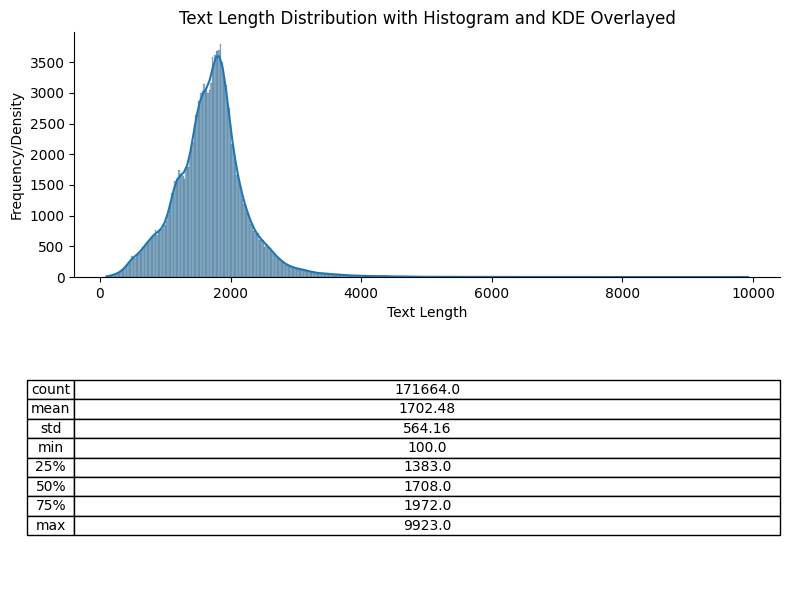

In [10]:
# Seems that the largest article abstract is an article. 
# Lets just sort them.
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

all_drug_texts = pd.read_csv('/home/rust/Downloads/IBMC/NLP/all_texts_for_drugs.csv', sep="\t")

all_drug_texts_sorted = all_drug_texts.sort_values(
    by='Text', 
    key=lambda x: x.str.len(), 
    ascending=True
)

# Drop outliers
all_drug_texts_sorted['text_length'] = all_drug_texts['Text'].str.len()
all_drug_texts_sorted_removed = all_drug_texts_sorted[36:len(all_drug_texts_sorted)-2]
all_drug_texts_sorted_removed = all_drug_texts_sorted_removed.drop_duplicates(subset=['Text'], keep='first')
#all_drug_texts_sorted_removed.to_csv("all_texts_for_drugs_remove.csv")

#Build histograms
fig = plt.figure(figsize=(8,6))
gs = gridspec.GridSpec(2, 1)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

# Plot histogram on top subplot
sns.histplot(ax=ax1, data=all_drug_texts_sorted_removed["text_length"], kde=True)
ax1.set_title('Text Length Distribution with Histogram and KDE Overlayed')
ax1.set_xlabel('Text Length')
ax1.set_ylabel('Frequency/Density')
sns.despine()

desc_table = all_drug_texts_sorted_removed['text_length'].describe().round(2)
#desc_table = desc_table[['count', 'mean', 'std', '50%', 'max', 'min']]
desc_table = desc_table.to_frame()

#print(desc_table.columns)

table_ax = ax2.axis('off')

# Create the table in the second subplot area (manually positioning it might be needed)
plt.table(
    cellText=desc_table.values,
    rowLabels=desc_table.index,
    cellLoc="center",
    rowLoc="center",
    colLoc="center",
    loc="center",
    colWidths=[1.0,1.0]
)

plt.tight_layout()
plt.show()
# Show plot



In [45]:
# MedMCQA antivirals
import pandas as pd

file_path = "./MedMCQA/train.json"
dictionary_file_antivir = "antivir_list.csv"
antivir_list = pd.read_csv(dictionary_file_antivir)
antivir_list = antivir_list["Drugs"].to_list()
pattern = '|'.join([f'(?i){antivir}' for antivir in antivir_list])

MedMCQA = pd.read_json(path_or_buf=file_path, lines=True)
MedMCQA = MedMCQA[MedMCQA["choice_type"].str.contains('single')]
#MedMCQA_exp = MedMCQA[MedMCQA["exp"].str.contains(pattern, na=False)]
MedMCQA_Q = MedMCQA[MedMCQA["question"].str.contains(pattern, na=False)]
MedMCQA_opa = MedMCQA[MedMCQA["opa"].str.contains(pattern, na=False)]
MedMCQA_opb = MedMCQA[MedMCQA["opb"].str.contains(pattern, na=False)]
MedMCQA_opc = MedMCQA[MedMCQA["opc"].str.contains(pattern, na=False)]
MedMCQA_opd = MedMCQA[MedMCQA["opd"].str.contains(pattern, na=False)]
frames = [MedMCQA_Q, MedMCQA_opa, MedMCQA_opb, MedMCQA_opc, MedMCQA_opd]
result = pd.concat(frames)
result
#print(len(result))
result.to_csv("MedMCQA_antivirals_2.csv")
#result = result.drop_duplicates()
#result = result.to_csv("./MedMCQA/MedMCQA_vir_Q_2.csv")

In [39]:
#MedQA antivirals
import json
file_path = "/home/rust/Downloads/IBMC/NLP/Eval/MedQA/questions/US/train.jsonl"

dictionary_file_antivir = "antivir_list.csv"
antivir_list = pd.read_csv(dictionary_file_antivir)
antivir_list = antivir_list["Drugs"].to_list()
pattern = '|'.join([f'(?i){antivir}' for antivir in antivir_list])

med_qa = pd.read_json(path_or_buf=file_path, lines=True)
med_qa = med_qa.drop(columns=["meta_info"])
med_qa['options'] = med_qa['options'].astype(str)
med_qa["question"] = med_qa['question'].str.cat(med_qa['options'], sep=": ")
med_qa["answer"] = med_qa['answer_idx'].str.cat(med_qa['answer'], sep=": ")
med_qa = med_qa.drop(columns=["answer_idx", "options"])

med_qa_question = med_qa[med_qa["question"].str.contains(pattern, na=False)]
med_qa_options = med_qa[med_qa["answer"].str.contains(pattern, na=False)]
frames = [med_qa_question, med_qa_options]
result = pd.concat(frames)
result = result.drop_duplicates()
result.to_csv("MedQA_antivirals.csv")
print(len(result))


KeyboardInterrupt: 

In [37]:
#PubMedQA antivirals

import pandas as pd
import json
import itertools

file_path = "./PubMedQA/ori_pqaa.json"

dictionary_file_antivir = "antivir_list.csv"
antivir_list = pd.read_csv(dictionary_file_antivir)
antivir_list = antivir_list["Drugs"].to_list()
pattern = '|'.join([f'(?i){antivir}' for antivir in antivir_list])


pubmed_QA = pd.read_json(path_or_buf=file_path, orient="columns")
pubmed_QA = pubmed_QA.transpose()
#pubmed_QA.head(10)


pubmed_QA_question = pubmed_QA[pubmed_QA["QUESTION"].str.contains(pattern, na=False)]
pubmed_QA_contexts = pubmed_QA[pubmed_QA["CONTEXTS"].str.contains(pattern, na=False)]
pubmed_QA_meshes = pubmed_QA[pubmed_QA["MESHES"].str.contains(pattern, na=False)]

frames = [pubmed_QA_question, pubmed_QA_contexts, pubmed_QA_meshes]
result = pd.concat(frames)
result.to_csv("PubMedQA_antivirals.csv")

#pubmed_QA_question = pubmed_QA_question.to_csv("./PubMedQA/PubMed_QA_vir.csv")

KeyboardInterrupt: 

In [10]:
test = pd.read_csv("MedQA_antivirals.csv")
test = test[["question", "answer"]]

test_frame = pd.DataFrame()

for question in test["question"]:
    print(question)

test.to_csv("MedQA_antivirals.csv")

A 24-year-old G2P1 woman at 39 weeks’ gestation presents to the emergency department complaining of painful contractions occurring every 10 minutes for the past 2 hours, consistent with latent labor. She says she has not experienced vaginal discharge, bleeding, or fluid leakage, and is currently taking no medications. On physical examination, her blood pressure is 110/70 mm Hg, heart rate is 86/min, and temperature is 37.6°C (99.7°F). She has had little prenatal care and uses condoms inconsistently. Her sexually transmitted infections status is unknown. As part of the patient’s workup, she undergoes a series of rapid screening tests that result in the administration of zidovudine during delivery. The infant is also given zidovudine to reduce the risk of transmission. A confirmatory test is then performed in the mother to confirm the diagnosis of HIV. Which of the following is most true about the confirmatory test?: {'A': 'It determines the genotype of the virus', 'B': 'It is a Southwes

In [1]:
import pandas as pd

PubMedQA_with_generated_answers = pd.read_csv("/home/rust/Downloads/IBMC/NLP/antiviral_rag/questionnaires/PubMedQA_with_generated_answers.csv")
PubMedQA_with_generated_answers["ROUGE_SCORE"].describe()



In [9]:
#MedMCQA processing
import pandas as pd

MedMCQA_antivirals = pd.read_csv("MedMCQA_antivirals.csv")
MedMCQA_antivirals.drop_duplicates(subset="question")
MedMCQA_antivirals
#MedMCQA_antivirals.to_csv("MedMCQA_antivirals.csv")

,Unnamed: 0.1,Unnamed: 0,question,opa,opb,opc,opd,subject_name,topic_name,id,choice_type
0,0,2193,Gancyclovir is more effective than acyclovir a...,HSV,CMV,EBV,VZV,Unknown,NaN,9f9b9adb-8b7f-457f-b909-54b87cfffeb3,single
1,1,2891,Idoxuridine is used for treatment of ?,Influenza,RSV,HSV,HIV,Pharmacology,NaN,4c7cd8e5-52cf-401d-976d-b9abefef62d7,single
2,2,4098,What is the effect of co administration of rif...,Area Under Curve decreased by 15%,Area Under Curve decreased by 35%,Area Under Curve increased by 15%,Area Under Curve increased by 35%,Pharmacology,NaN,d79714f1-dfb4-4d09-aa31-9a753a16d6e1,single
3,3,4394,Mechanism of action of Oseltamivir?,Protein synthesis inhibitor,Thymidylate synthetase inhibitor,Neuraminidase inhibitor,Pyrimidine analogs.,Pharmacology,NaN,f1bf6407-23ff-49cb-afca-def060636376,single
4,4,2072,Which of the following anti-retroviral drugs i...,Nevirapine,Ritonavir,Saquinavir,Nelfinavir,Unknown,NaN,438c866d-af25-48c5-aa3d-97bffe7afeb5,single
5,5,2364,Which antiretroviral drug is known to be assoc...,Saquinavir,Ritonavir,Nelfinavir,Indinavir,Unknown,NaN,20ed61c0-0ca2-4610-93ff-789277b8c6a9,single
6,6,4426,Which drug is most likely to cause lipodystrophy:,Zidovudine (AZT),Didanosine (DDI),Nevirapine,Saquinavir,Unknown,NaN,ff76fba3-879b-4c01-bb03-848b4c38b712,single
7,7,5823,6 year old son of pregnant women is suffering ...,Acyclovir,Acyclovir + immunoglobulin,Only immunoglobulin,Vaccination,Gynaecology & Obstetrics,NaN,d443ab6c-712c-40f5-9349-aa5e10700d96,single
8,8,2072,Which of the following anti-retroviral drugs i...,Nevirapine,Ritonavir,Saquinavir,Nelfinavir,Unknown,NaN,438c866d-af25-48c5-aa3d-97bffe7afeb5,single
9,9,2364,Which antiretroviral drug is known to be assoc...,Saquinavir,Ritonavir,Nelfinavir,Indinavir,Unknown,NaN,20ed61c0-0ca2-4610-93ff-789277b8c6a9,single


In [ ]:
# Remove the Document() parts to make it JSON-like
text = text.replace("Document(", "").replace(")", "")
text = "[" + text + "]"

# Parse the string into a list of dictionaries
import ast
documents = ast.literal_eval(text)

# Extract data into lists
relevance_scores = [document['metadata']['relevance_score'] for document in documents]
page_contents = [document['page_content'] for document in documents]

# Calculate mean relevance score
mean_relevance_score = sum(relevance_scores) / len(relevance_scores)

# Join page contents with \n\n separator
joined_page_content = '\n\n'.join(page_contents)

# Create a DataFrame
df = pd.DataFrame({
    'MEAN_RELEVANCE_SCORE': [mean_relevance_score],
    'PAGE_CONTENT': [joined_page_content]
})

print(df)

In [1]:
import pandas as pd
import ast

df = pd.read_csv("/home/rust/Downloads/IBMC/NLP/antiviral_rag/questionnaires/#PubMedQA_with_generated_answers_2.csv")

df

,QUESTION,LONG_ANSWER,final_decision,GENERATED_ANSWER,RETRIEVED_DOCUMENTS
0,Does the dual CCR5 and CCR2 inhibitor cenicriv...,"In contrast to maraviroc, cenicriviroc does no...",no,"Based on the provided context information, th...","[Document(metadata={'id': 10, 'relevance_score..."
1,Do clinical events after cessation of lamivudi...,Cessation of lamivudine therapy after recovery...,yes,"Based on the provided context information, th...","[Document(metadata={'id': 11, 'relevance_score..."
2,Do identification of UQCRB as an oxymatrine re...,"In this study, using the T7 phage display syst...",yes,"Yes, according to the provided context inform...","[Document(metadata={'id': 0, 'relevance_score'..."
3,Does pharmacogenetics of efavirenz discontinua...,Slow metabolizer genotypes were associated sig...,yes,"Based on the provided context information, th...","[Document(metadata={'id': 19, 'relevance_score..."
4,Does abacavir have no prothrombotic effect on ...,Our results suggest that abacavir does not sig...,yes,"Based on the provided context information, th...","[Document(metadata={'id': 9, 'relevance_score'..."
...,...,...,...,...,...
729,Is interferon-alpha effective in the treatment...,Interferon-alpha is a safe and effective treat...,yes,NaN,NaN
730,Does hIV protease inhibitor ritonavir induce c...,"These data demonstrate, for the first time, th...",yes,NaN,NaN
731,Does prophylactic lamivudine prevent hepatitis...,Prophylactic lamivudine appears to prevent hep...,yes,NaN,NaN
732,Does lamivudine increase the efficacy of inter...,These pilot data showed that lamivudine did no...,no,NaN,NaN


In [3]:
#MedMCQA_2
import pandas as pd
MedMCQA_vir_Q_2 = pd.read_csv("/home/rust/Downloads/IBMC/NLP/Eval/MedMCQA/MedMCQA_vir_Q_2.csv")
MedMCQA_vir_Q_2.dropna(subset=['exp'])

,Unnamed: 0,question,exp,cop,opa,opb,opc,opd,subject_name,topic_name,id,choice_type
0,23,A mother is Hbs Ag positive and anti Hbe Ag po...,Before answering these questions lets first di...,1,20%,50%,0%,90%,Gynaecology & Obstetrics,NaN,7f0270fd-7d45-43ec-b77e-0038115bb845,single
1,69,SD plasma destroys lipid enveloped virus. On S...,Since SD plasma destroys lipid enveloped virus...,2,HIV,HAV,HBV,HCV,Microbiology,AIIMS 2018,1e94a9ca-55e4-4e9a-bf7b-cb2dc4ba2ab5,single
2,117,Absorption of which of the following drugs is ...,Ans: B. Griseofulvin (Ref: Goodman Gilman I2/e...,2,Amphotericin B,Griseofulvin,Ampicillin,Aspirin,Pharmacology,NaN,e881fcb0-a4f2-45ed-97cf-c53045f98e30,single
3,347,Which of the following techniques is based on ...,Ans: A. PCRReverse transcription-polymerase ch...,1,PCR,Sanger's technique,Next generation sequencing,Western blot,Biochemistry,NaN,179b5138-d8ce-4e02-9445-ada73b642671,single
4,391,Most common infection post solid organ transpl...,Cytomegalovirus (CMV) is transmitted post soli...,1,CMV,HSV,EBV,HPV,Microbiology,AIIMS 2019,4c74361f-7de5-4a70-9221-c8f5c9554081,single
...,...,...,...,...,...,...,...,...,...,...,...,...
92,220,"A 60-year old male presents with painful, 141 ...",Ans. a. Varicella zosterA 60-year-old male pre...,1,Varicella zoster,Herpes simplex,Pox virus,Papilloma virus,ENT,NaN,624cf635-1421-416e-978a-996781f350c0,single
93,361,Which of the following will not decrease mothe...,Answer- B (Vaginal delievery)Vaginal delivery ...,2,Avoid breastfeeding,Vaginal delivery,Zidovudine given to mother antenataly and to n...,Vitamin A supplementation given to mother,Gynaecology & Obstetrics,NaN,93d8bac0-76ae-4440-91c0-fa3b724bbc65,single
96,3171,A 50 years old patient presented with progress...,Answer- A. Jaundice due to choledocholithiasis...,1,Jaundice due to choledocholithiasis,Dubin-Johnson syndrome,Viral hepatitis,Malignant obstructive jaundice,Medicine,NaN,feecbe83-6510-4c8d-bbac-3a4c02b96915,single
97,1833,What is the effective management of a dengue p...,Answer- C. IV fluidsSuppoive care with analges...,3,Steroids,Platelet transfusion,IV fluids,Antiviral,Medicine,NaN,d4208506-5d94-4956-8af6-8dd7c471ae8b,single


In [47]:
MedMCQA_antivirals = pd.read_csv("/home/rust/Downloads/IBMC/NLP/Eval/MedMCQA_antivirals_2.csv")



MedMCQA_antivirals["opa"] = '1) ' + MedMCQA_antivirals['opa'].astype(str)
MedMCQA_antivirals["opb"] = '2) ' + MedMCQA_antivirals['opb'].astype(str)
MedMCQA_antivirals["opc"] = '3) ' + MedMCQA_antivirals['opc'].astype(str)
MedMCQA_antivirals["opd"] = '4) ' + MedMCQA_antivirals['opd'].astype(str)
MedMCQA_antivirals = MedMCQA_antivirals[['question', 'cop', 'exp', 'opa', 'opb', 'opc', 'opd']]
MedMCQA_antivirals = MedMCQA_antivirals.dropna(subset=['exp'])
MedMCQA_antivirals['answers'] = MedMCQA_antivirals['opa'].astype(str) + ", " + MedMCQA_antivirals['opb'].astype(str) + ", " + MedMCQA_antivirals['opc'].astype(str) + ", " + MedMCQA_antivirals['opd'].astype(str)
MedMCQA_antivirals = MedMCQA_antivirals[['question', 'answers', 'cop', 'exp']]
MedMCQA_antivirals['question'] = MedMCQA_antivirals['question'].astype(str) + " " + MedMCQA_antivirals['answers'].astype(str)
MedMCQA_antivirals = MedMCQA_antivirals[["question", "cop", "exp"]]

MedMCQA_antivirals.to_csv("MedMCQA_antivirals_3.csv")




In [37]:
#MedMCQA_antivirals_with_generated_answers_parsing

import pandas as pd
import re

df = pd.read_csv(
    '/home/rust/Downloads/IBMC/NLP/antiviral_rag/questionnaires/MedMCQA_antivirals_with_generated_answers.csv')


# Function to extract page_content and add to new columns
def extract_page_content(df):
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        # Use regular expression to extract page_content from the string
        page_contents = re.findall(r"page_content='([^']*)'", row['RETRIEVED_DOCUMENTS'])
        relevance_scores = re.findall(r"relevance_score': ([0-9\.]+)", row['RETRIEVED_DOCUMENTS'])
        # Add page_contents to new columns
        for i, content in enumerate(page_contents):
            df.at[index, f"page_content_{i+1}"] = content
    
    return df

def extract_relevance_score(df):
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        # Use regular expression to extract relevance_score from the string
        relevance_scores = re.findall(r"relevance_score': ([0-9\.]+)", row['RETRIEVED_DOCUMENTS'])
        
        # Add relevance_scores to new columns
        for i, score in enumerate(relevance_scores):
            df.at[index, f"relevance_score_{i+1}"] = float(score)
    
    return df

# Apply the function to the DataFrame
df = extract_relevance_score(df)

# Apply the function to the DataFrame
df = extract_page_content(df)

def remove_pubmed_id(text):
    # Regular expression pattern to match "PubMedID: XXXXXXXX\nText:"
    text = str(text)
    pattern = r".*?Text:"
    
    # Use re.sub to replace the pattern with an empty string
    cleaned_text = re.sub(pattern, "", text, flags=re.IGNORECASE)
    
    return cleaned_text

# Apply the function to the DataFrame column
df['page_content_1'] = df['page_content_1'].apply(remove_pubmed_id)
df['page_content_2'] = df['page_content_2'].apply(remove_pubmed_id)
df['page_content_3'] = df['page_content_3'].apply(remove_pubmed_id)
df['page_content_4'] = df['page_content_4'].apply(remove_pubmed_id)

df['page_content_1'] = df['page_content_1'].apply(lambda x: x.lstrip(". "))
df['page_content_2'] = df['page_content_2'].apply(lambda x: x.lstrip(". "))
df['page_content_3'] = df['page_content_3'].apply(lambda x: x.lstrip(". "))
df['page_content_4'] = df['page_content_4'].apply(lambda x: x.lstrip(". "))

df['mean_relevance_score'] = df[['relevance_score_1', 'relevance_score_2', 'relevance_score_3', 'relevance_score_4']].mean(axis=1)
df = df[
    ['question',
     'exp',
     'cop',
     'GENERATED_ANSWER',  
     'page_content_1', 
     'page_content_2', 
     'page_content_3', 
     'page_content_4',
     'mean_relevance_score'
    ]
]




df.to_csv('/home/rust/Downloads/IBMC/NLP/antiviral_rag/questionnaires/MedMCQA_antivirals_with_generated_answers_processed.csv')

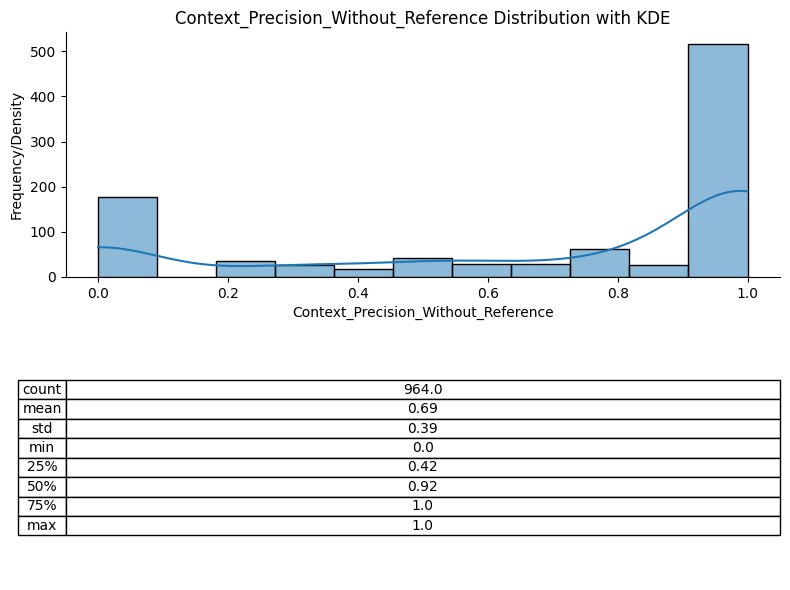

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

df = pd.read_csv('/home/rust/Downloads/IBMC/NLP/antiviral_rag/questionnaires/MedMCQA_antivirals_with_generated_answers_processed.csv')

fig = plt.figure(figsize=(8,6))
gs = gridspec.GridSpec(2, 1)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

# Plot histogram on top subplot
sns.histplot(ax=ax1, data=df["Context_Precision_Without_Reference"], kde=True)
ax1.set_title('Context_Precision_Without_Reference Distribution with KDE')
ax1.set_xlabel('Context_Precision_Without_Reference')
ax1.set_ylabel('Frequency/Density')
sns.despine()

desc_table = df['Context_Precision_Without_Reference'].describe().round(2)
desc_table = desc_table.to_frame()

#print(desc_table.columns)

table_ax = ax2.axis('off')

# Create the table in the second subplot area (manually positioning it might be needed)
plt.table(
    cellText=desc_table.values,
    rowLabels=desc_table.index,
    cellLoc="center",
    rowLoc="center",
    colLoc="center",
    loc="center",
    colWidths=[1.0,1.0]
)

plt.tight_layout()
plt.show()
# Show plot







In [97]:
import pandas as pd
from langchain_ollama import ChatOllama, OllamaEmbeddings
from langchain_core.prompts import ChatPromptTemplate
from typing import List
import re
from langchain_core.tools import tool
df = pd.read_csv('/home/rust/Downloads/IBMC/NLP/antiviral_rag/questionnaires/MedMCQA_antivirals_with_generated_answers_processed.csv')

df["Extracted_Answer"] = None

def extract_answer(answer_number: int, text: str) -> bool:
    """Extract the correct answer number from text

    Args:
        answer_number (int): the number of correct answer
        text (str): text in which correct answer is stated
    """
    return True

extractor_llm = ChatOllama(
    base_url = "http://localhost:11434",
    model="qwen2.5:latest",
    timeout=600, 
    temperature=0.0,
    disable_streaming=False,
    num_ctx=4096,
).bind_tools([extract_answer])

#result = extractor_llm.invoke(
#    "Answer: 1) Mutations at reverse transcriptase "
#    "The context provided mentions several studies that discuss " 
#    "resistance to zidovudine, and mutations in the reverse "
#    "transcriptase enzyme are consistently highlighted as a "
#    "key factor. Specifically, mutations at codons 215 or 41 were "
#    "found to be prevalent among HIV-1 isolates from patients with "
#    "prior zidovudine therapy, and these mutations were associated "
#    "with an increased risk of progression and death. Additionally, "
#    "other studies noted the emergence of specific mutations in reverse "
#    "transcriptase that are classically associated with zidovudine "
#    "resistance."
#)

#print(result)


for index, row in df.iterrows():
    text = row["GENERATED_ANSWER"]
    try:
        result = extractor_llm.invoke(text)
        if not hasattr(result, 'tool_calls') or not result.tool_calls:
            print(f"Invalid result for index {index}. Skipping...")
            continue
        result = result.tool_calls
        found_answer = False
        for call in result:
            if call['name'] == 'extract_answer':
                generated_answer = call['args']['answer_number']
                df.at[index, "Extracted_Answer"] = generated_answer
                df.to_csv("/home/rust/Downloads/IBMC/NLP/antiviral_rag/questionnaires/MedMCQA_antivirals_with_generated_answers_processed_extracted_answers.csv", index=False)
                found_answer = True
        if not found_answer:
            print(f'Answer for {index} not found')
    except Exception as e:
        print(f"Error processing index {index}: {e}")


        #print(extracted_answer + "\n" + extracted_answer_text + "\n"  "===================================================================" + "\n\n")
        
        #MedMCQA_antivirals_with_generated_answers.at[index, "Context_Precision_Without_Reference"] = generated
        
    #print(s)
    #match = re.search(pattern, s)
    #answer_number = int(match.group(1))
    #print(answer_number)
    
#    prompt = ChatPromptTemplate.from_messages(
#        [
#            (
#                "system",
#                "You are a helpful assistant that ONLY extracts the {correct answer number} from text and NOTHING ELSE",
#            ),
#            ("human", "{input}"),
#        ]
#    )
#    chain = prompt | extractor_llm
#    response = chain.invoke(
#        {
#            "input": text,
#            "correct answer number": "(int)"
#        }
#    )
#    print(response.content)


Invalid result for index 4. Skipping...
Invalid result for index 12. Skipping...
Invalid result for index 19. Skipping...
Invalid result for index 20. Skipping...
Invalid result for index 30. Skipping...
Invalid result for index 42. Skipping...
Invalid result for index 53. Skipping...
Invalid result for index 84. Skipping...
Invalid result for index 85. Skipping...
Invalid result for index 90. Skipping...
Invalid result for index 91. Skipping...
Invalid result for index 92. Skipping...
Invalid result for index 116. Skipping...
Invalid result for index 127. Skipping...
Invalid result for index 158. Skipping...
Invalid result for index 181. Skipping...
Invalid result for index 182. Skipping...
Invalid result for index 194. Skipping...
Invalid result for index 266. Skipping...
Invalid result for index 275. Skipping...
Invalid result for index 280. Skipping...
Invalid result for index 323. Skipping...
Invalid result for index 335. Skipping...
Invalid result for index 369. Skipping...
Inval

In [12]:
import pandas as pd
import numpy as np

df = pd.read_csv('/home/rust/Downloads/IBMC/NLP/antiviral_rag/questionnaires/MedMCQA_antivirals_with_generated_answers_processed.csv')
stat = df[['mean_relevance_score', 'Faithfulness', 'Context_Precision_Without_Reference', 'Correct']].describe()
stat = stat.drop(['count', 'min', '25%', '75%', 'max', '50%', 'std'])
stat = stat.transpose()

def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')


stat = stat.rename(
    columns={
        'mean': 'Average'
    },
    index={
        'mean_relevance_score': 'Relevance Score (float)',
        'Faithfulness': 'Faithfulness (float)',
        'Context_Precision_Without_Reference': 'Context Precision Without Reference (float)',
        'Correct': "Is Correct (bool)"
    }
)

stat = stat.style.background_gradient(cmap="Greens")

stat


,Average
Relevance Score (float),0.999125
Faithfulness (float),0.489419
Context Precision Without Reference (float),0.691160
Is Correct (bool),0.727178


In [175]:
df = pd.read_csv('/home/rust/Downloads/IBMC/NLP/antiviral_rag/questionnaires/MedMCQA_antivirals_with_generated_answers_processed.csv')

df.drop(df.filter(regex='Unnamed'), axis=1, inplace=True)
from IPython.display import display, HTML


df = df.rename(
    columns={
        'question': 'Question',
        'cop': 'Expert Labeled Correct Option',
        'Extracted_Answer': "LLM Chosen Option Extracted from LLM Generated Answer",
        'exp': 'Expert Explanation',
        'GENERATED_ANSWER': "LLM Generated Answer",
        'page_content_1': 'LLM Retrieved Context 1',
        'page_content_2': 'LLM Retrieved Context 2',
        'page_content_3': 'LLM Retrieved Context 3',
        'page_content_4': 'LLM Retrieved Context 4',
        'mean_relevance_score': 'Relevance Score for Retrieved Contexts',
        'ROUGE_SCORE': 'ROUGE Score',
        'Context_Precision_Without_Reference': 'CPWR',
        'Correct': 'Is Correct (Accuracy)'
    }
)


df = df[
    [
        'Question',
        'Expert Labeled Correct Option',
        'Expert Explanation',
        'LLM Generated Answer',
        'LLM Chosen Option Extracted from LLM Generated Answer',
        'LLM Retrieved Context 1',
        'LLM Retrieved Context 2',
        'LLM Retrieved Context 3',
        'LLM Retrieved Context 4'
    ]
]

df['LLM Chosen Option Extracted from LLM Generated Answer'] = df['LLM Chosen Option Extracted from LLM Generated Answer'].astype(int)

#print(len(df))

df.drop_duplicates(subset=['Question'])
print(len(df))

#df.to_html('/home/rust/Downloads/IBMC/NLP/antiviral_rag/questionnaires/html')



964


In [184]:
import pandas as pd
data = {
    'Question': ['Question 1', 'Question 2', '...', 'Question 963', 'Question 964'],
    'Expert Labeled Correct Option': [3, 4, '...', 3, 4],
    'Expert Explanation': ['Explanation 1', 'Explanation 2', '...', 'Explanation 963', 'Explanation 964'],
    'LLM Generated Answer': ['Answer 1', 'Answer 2', '...', 'Answer 963', 'Answer 964'],
    'LLM Chosen Option Extracted from LLM Generated Answer': [1, 4, '...', 4, 4],
    'LLM Retrieved Context 1': ['Context 1 For Question 1', 'Context 1 for Question 2', '...', 'Context 1 for Question 963', 'Context 1 for Question 964'],
    'LLM Retrieved Context 2': ['Context 2 For Question 1', 'Context 2 for Question 2', '...', 'Context 2 for Question 963', 'Context 2 for Question 964'],
    'LLM Retrieved Context 3': ['Context 3 For Question 1', 'Context 3 for Question 2', '...', 'Context 3 for Question 963', 'Context 3 for Question 964'],
    'LLM Retrieved Context 4' : ['Context 4 For Question 1', 'Context 4 for Question 2', '...', 'Context 4 for Question 963', 'Context 4 for Question 964']

}

df = pd.DataFrame(data)
df = df.transpose()

#df.to_html('/home/rust/Downloads/IBMC/NLP/antiviral_rag/questionnaires/example.html')



display(HTML(df.to_html()))









,0,1,2,3,4
Question,Question 1,Question 2,...,Question 963,Question 964
Expert Labeled Correct Option,3,4,...,3,4
Expert Explanation,Explanation 1,Explanation 2,...,Explanation 963,Explanation 964
LLM Generated Answer,Answer 1,Answer 2,...,Answer 963,Answer 964
LLM Chosen Option Extracted from LLM Generated Answer,1,4,...,4,4
LLM Retrieved Context 1,Context 1 For Question 1,Context 1 for Question 2,...,Context 1 for Question 963,Context 1 for Question 964
LLM Retrieved Context 2,Context 2 For Question 1,Context 2 for Question 2,...,Context 2 for Question 963,Context 2 for Question 964
LLM Retrieved Context 3,Context 3 For Question 1,Context 3 for Question 2,...,Context 3 for Question 963,Context 3 for Question 964
LLM Retrieved Context 4,Context 4 For Question 1,Context 4 for Question 2,...,Context 4 for Question 963,Context 4 for Question 964
